<a href="https://colab.research.google.com/github/Akshath47/MachineLearningTests/blob/main/StockmarketPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tata Stocks**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_train = pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [ ]:
new_column_names = {
    'Total Trade Quantity': 'Total Volume',
    'Turnover (Lacs)': 'Turnover'
}
dataset_train.rename(columns=new_column_names, inplace=True)

In [ ]:
dataset_train

,Date,Open,High,Low,Last,Close,Total Volume,Turnover
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
df_test = dataset_train.head(100)

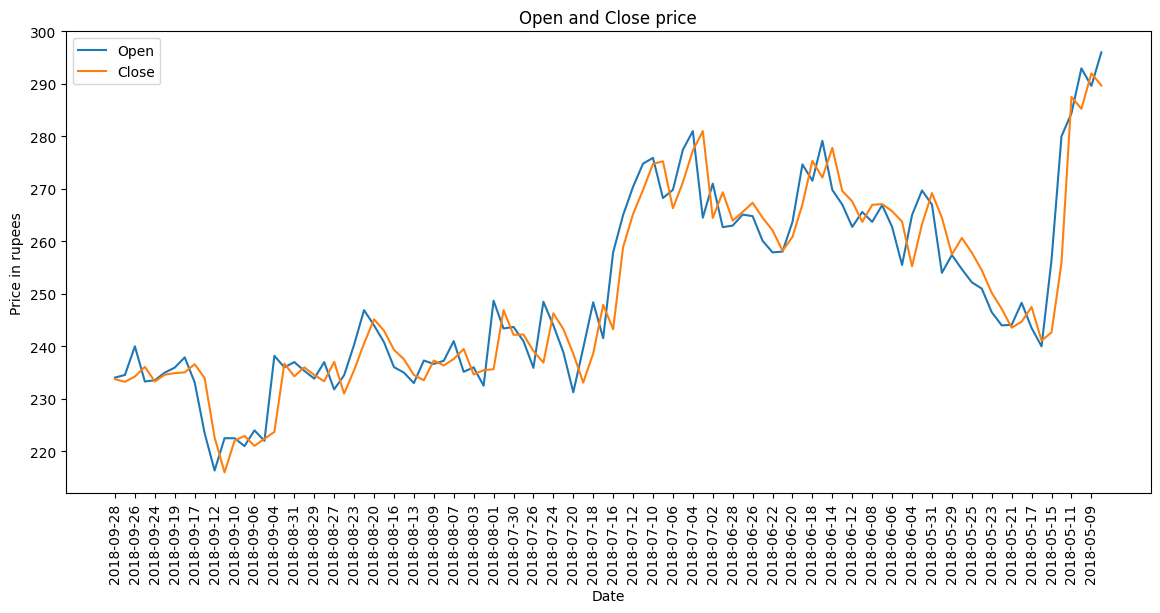

In [ ]:
#Graphing open and close price for past 100 days
plt.figure(figsize=(14,6))
plt.plot(df_test['Date'], df_test['Open'], label='Open')
plt.plot(df_test['Date'], df_test['Close'], label='Close')
plt.title('Open and Close price')
plt.ylabel('Price in rupees')
plt.xlabel('Date')

# Set alternate x-ticks
xticks_positions = [df_test['Date'][i] for i in range(len(df_test['Date'])) if i % 2 == 0]  # Select every other tick position
xticks_labels = [i for i in xticks_positions]  # Provide labels for the selected tick positions
plt.xticks(xticks_positions, xticks_labels)
plt.xticks(rotation=90)

plt.legend()

plt.show()

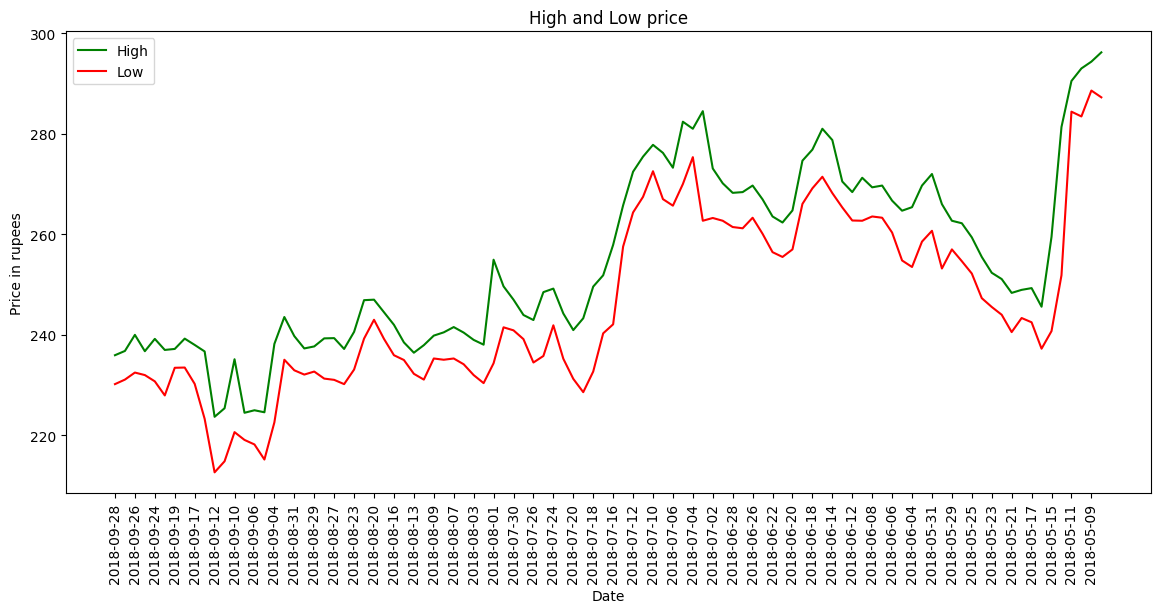

In [ ]:
#Graphing highs and lows for past 100 days
plt.figure(figsize=(14,6))
plt.plot(df_test['Date'], df_test['High'], label='High', color='green')
plt.plot(df_test['Date'], df_test['Low'], label='Low', color='red')
plt.title('High and Low price')
plt.ylabel('Price in rupees')
plt.xlabel('Date')

# Set alternate x-ticks
xticks_positions = [df_test['Date'][i] for i in range(len(df_test['Date'])) if i % 2 == 0]  # Select every other tick position
xticks_labels = [i for i in xticks_positions]  # Provide labels for the selected tick positions
plt.xticks(xticks_positions, xticks_labels)
plt.xticks(rotation=90)

plt.legend()

plt.show()

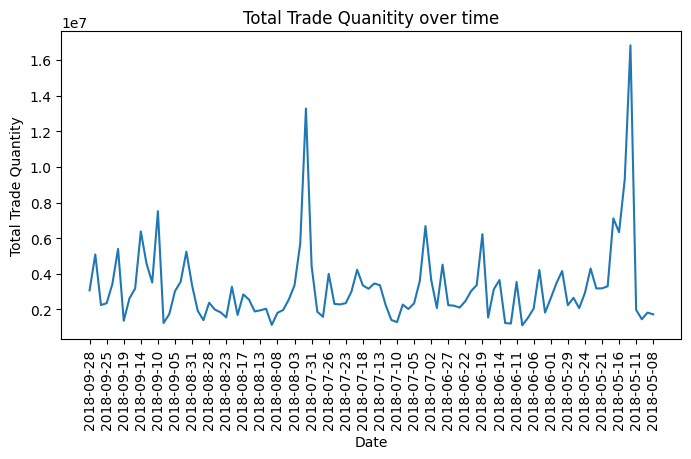

In [ ]:
#Graphing total trade quantity for past 100 days
plt.figure(figsize=(8,4))
plt.plot(df_test['Date'], df_test['Total Volume'])
plt.title('Total Trade Quanitity over time')
plt.ylabel('Total Trade Quantity')
plt.xlabel('Date')

# Set alternate x-ticks
xticks_positions = [df_test['Date'][i] for i in range(len(df_test['Date'])) if i % 3 == 0]  # Select every third tick position
xticks_labels = [i for i in xticks_positions]  # Provide labels for the selected tick positions
plt.xticks(xticks_positions, xticks_labels)
plt.xticks(rotation=90)

plt.show()

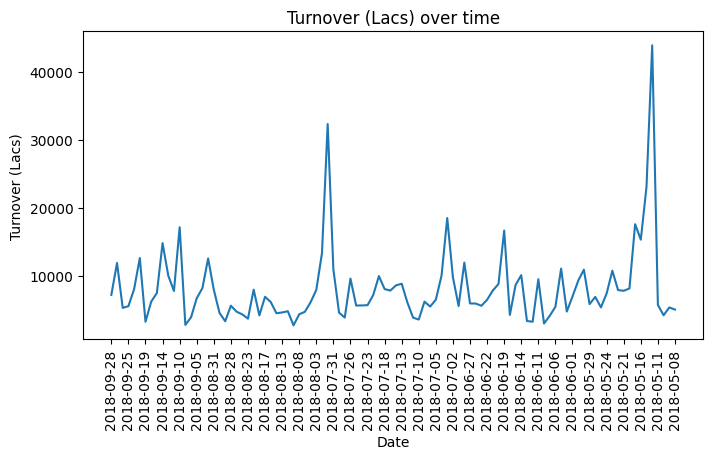

In [ ]:
#Graphing turnovers for past 100 days
plt.figure(figsize=(8,4))
plt.plot(df_test['Date'], df_test['Turnover'])
plt.title('Turnover (Lacs) over time')
plt.ylabel('Turnover (Lacs)')
plt.xlabel('Date')

# Set alternate x-ticks
xticks_positions = [df_test['Date'][i] for i in range(len(df_test['Date'])) if i % 3 == 0]  # Select every third tick position
xticks_labels = [i for i in xticks_positions]  # Provide labels for the selected tick positions
plt.xticks(xticks_positions, xticks_labels)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Feature Scaling
training_set = dataset_train.iloc[:, 1:2].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 12s 85ms/step - loss: 0.0101
Epoch 2/100
62/62 [==============================] - 7s 111ms/step - loss: 0.0033
Epoch 3/100
62/62 [==============================] - 6s 98ms/step - loss: 0.0037
Epoch 4/100
62/62 [==============================] - 10s 162ms/step - loss: 0.0027
Epoch 5/100
62/62 [==============================] - 6s 99ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 5s 85ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 6s 94ms/step - loss: 0.0024
Epoch 8/100
62/62 [==============================] - 5s 85ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 6s 95ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 5s 86ms/step - loss: 0.0018
Epoch 11/100
62/62 [==============================] - 6s 94ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 5s 85ms/step - loss: 0.0018
Epoch 13/100
62/62 [=

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65
5,2018-10-16,237.10,237.70,233.05,234.40,235.45,1723113,4052.25
6,2018-10-15,229.70,237.00,226.80,234.80,234.90,1224339,2845.68
7,2018-10-12,226.25,232.35,225.50,228.70,229.10,1165527,2675.91
8,2018-10-11,215.00,229.70,215.00,225.60,224.60,1293881,2890.85
9,2018-10-10,215.00,229.65,215.00,228.25,228.40,2919278,6557.95


In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 29ms/step


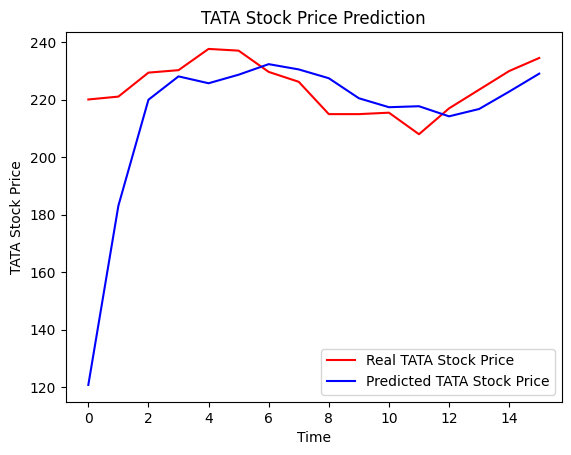

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

# **Stocks**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Neural Network

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_adani.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### stock # 1

In [ ]:
dataset_train_adani = pd.read_csv('/content/ADANIPORTS.csv')

In [ ]:
del dataset_train_adani['Symbol']
del dataset_train_adani['Series']
del dataset_train_adani['VWAP']
del dataset_train_adani['Trades']
del dataset_train_adani['Deliverable Volume']
del dataset_train_adani['%Deliverble']

In [ ]:
df_test_adani = dataset_train_adani.head(100)

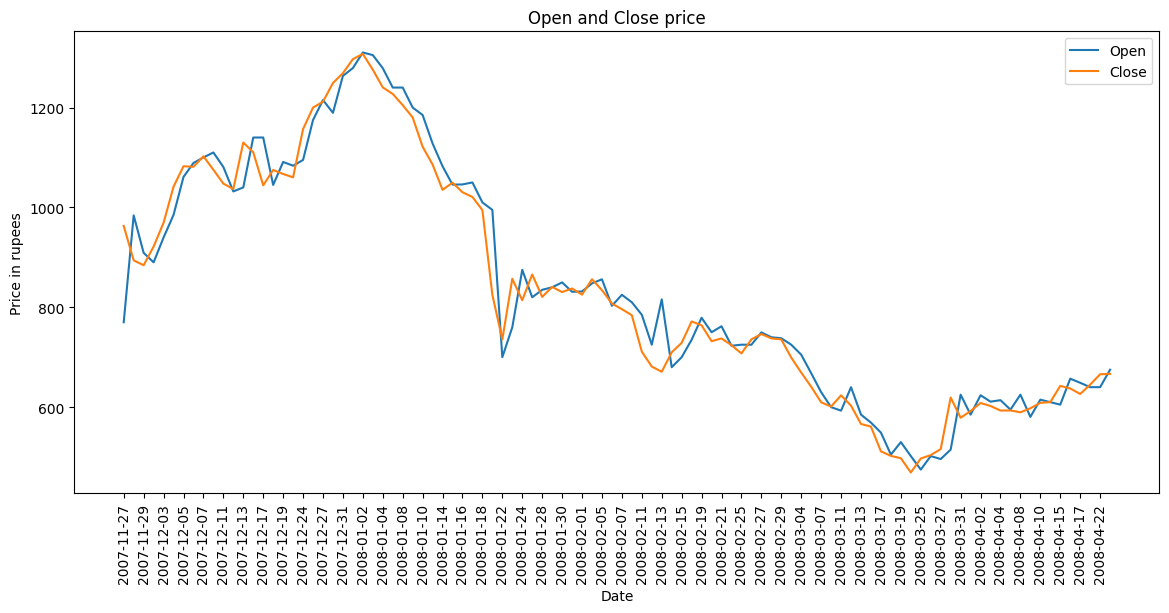

In [ ]:
#Graphing open and close price for past 100 days
plt.figure(figsize=(14,6))
plt.plot(df_test_adani['Date'], df_test_adani['Open'], label='Open')
plt.plot(df_test_adani['Date'], df_test_adani['Close'], label='Close')
plt.title('Open and Close price')
plt.ylabel('Price in rupees')
plt.xlabel('Date')

# Set alternate x-ticks
xticks_positions = [df_test_adani['Date'][i] for i in range(len(df_test_adani['Date'])) if i % 2 == 0]  # Select every other tick position
xticks_labels = [i for i in xticks_positions]  # Provide labels for the selected tick positions
plt.xticks(xticks_positions, xticks_labels)
plt.xticks(rotation=90)

plt.legend()

plt.show()

In [ ]:
# Feature Scaling
training_set_adani = dataset_train_adani['Open'].values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled_adani = sc.fit_transform(training_set_adani)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train_adani = []
y_train_adani = []
for i in range(60, len(training_set_adani)):
    X_train_adani.append(training_set_scaled_adani[i-60:i, 0])
    y_train_adani.append(training_set_scaled_adani[i, 0])
X_train_adani, y_train_adani = np.array(X_train_adani), np.array(y_train_adani)

In [ ]:
# Reshaping
X_train_adani = np.reshape(X_train_adani, (X_train_adani.shape[0], X_train_adani.shape[1], 1))

In [ ]:
# Splitting for train and test data
from sklearn.model_selection import train_test_split
X_train_adani, X_test_adani, y_train_adani,y_test_adani = train_test_split(X_train_adani, y_train_adani, test_size=0.2, random_state=42)

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train_adani, y_train_adani, epochs = 100, batch_size = 32)

Epoch 1/100
82/82 [==============================] - 20s 133ms/step - loss: 0.0052
Epoch 2/100
82/82 [==============================] - 10s 125ms/step - loss: 0.0023
Epoch 3/100
82/82 [==============================] - 11s 137ms/step - loss: 0.0018
Epoch 4/100
82/82 [==============================] - 11s 137ms/step - loss: 0.0016
Epoch 5/100
82/82 [==============================] - 11s 137ms/step - loss: 0.0017
Epoch 6/100
82/82 [==============================] - 11s 136ms/step - loss: 0.0015
Epoch 7/100
82/82 [==============================] - 11s 137ms/step - loss: 0.0015
Epoch 8/100
82/82 [==============================] - 11s 136ms/step - loss: 0.0015
Epoch 9/100
82/82 [==============================] - 10s 124ms/step - loss: 0.0013
Epoch 10/100
82/82 [==============================] - 11s 133ms/step - loss: 0.0013
Epoch 11/100
82/82 [==============================] - 11s 136ms/step - loss: 0.0012
Epoch 12/100
82/82 [==============================] - 11s 136ms/step - loss: 0.0011
E

In [ ]:
# Getting the predicted stock price of 2017
X_test = np.reshape(X_test_adani, (X_test_adani.shape[0], X_test_adani.shape[1], 1))
predicted_stock_price_adani = regressor.predict(X_test_adani)
predicted_stock_price_adani = sc.inverse_transform(predicted_stock_price_adani)

21/21 [==============================] - 3s 33ms/step


In [ ]:
real_stock_price_adani = sc.inverse_transform(y_test_adani[:len(predicted_stock_price_adani)].reshape(-1,1))

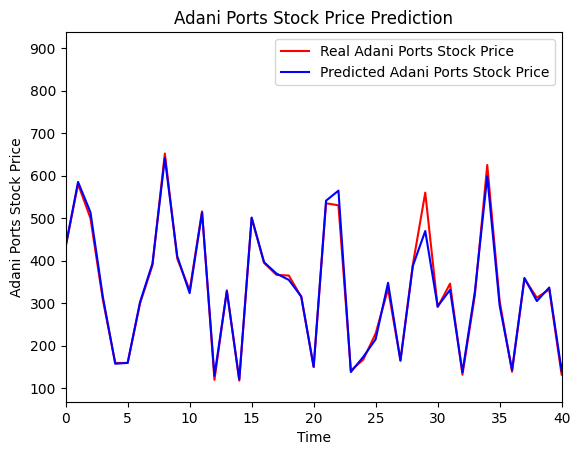

In [ ]:
# Visualising the results for 30 timestamps
plt.plot(real_stock_price_adani, color = 'red', label = 'Real Adani Ports Stock Price')
plt.plot(predicted_stock_price_adani, color = 'blue', label = 'Predicted Adani Ports Stock Price')
plt.title('Adani Ports Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adani Ports Stock Price')
plt.xlim(0,40)
plt.legend()
plt.show()

#### **Making predictions**

In [ ]:
def predictStock():
    date = input("Enter today's date. YYYY-MM-DD: ")
    try:
        idx = dataset_train_adani[dataset_train_adani['Date'] == date].index[0]
        dataset = dataset_train_adani[:idx+1]
    except:
        print("Data not available for this particular date")

    dataset = dataset['Open'].values.reshape(-1,1)
    dataset_scaled = sc.fit_transform(dataset)

    # Creating a data structure with 60 timesteps and 1 output
    dataset = []
    for i in range(60, len(dataset_scaled)):
        dataset.append(dataset_scaled[i-60:i, 0])
    dataset = np.array(dataset)

    data_test = np.reshape(dataset, (dataset.shape[0], dataset.shape[1], 1))

    predictions = regressor.predict(data_test)
    predictions = sc.inverse_transform(predictions)

    return predictions, idx

In [ ]:
def calculateStats(predictions):
    next_day_pred = predictions[-1][0]
    previous_day_price = predictions[-2][0]
    increase = round(100 * (next_day_pred - previous_day_price) / previous_day_price, 2)

    return next_day_pred, increase

In [ ]:
def plotPredictionsGraph(predictions):
    predictions_last30days = predictions[len(predictions)-32:]

    # Visualising prediction
    # Shows graph for last 30 days (1 month) and the next day's predicted value
    plt.figure(figsize=(10,6))
    plt.plot(predictions_last30days, color = 'blue', label = 'Predicted Adani Ports Stock Price ')
    plt.scatter(31, predictions_last30days[-1], marker='x', color='red', s=100)

    arrow_x = 31
    arrow_y = predictions_last30days[-1] - 2
    # Add the arrow using annotate()
    plt.annotate("    Predicted Price Tomorrow",
             xy=(arrow_x, arrow_y),
             arrowprops=dict(facecolor='green', shrink=0.05))

    # Customize the tick names on the x-axis
    new_tick_names = [30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0, 'Tomorrow']
    plt.gca().set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
    plt.gca().set_xticklabels(new_tick_names)
    plt.gca().get_xticklabels()[-1].set_rotation(90)

    plt.title('Adani Ports Stock Price Last 30 days')
    plt.xlabel('Days ago')
    plt.ylabel('Adani Ports Stock Price')
    plt.legend()
    plt.show()

In [ ]:
predictions, idx = predictStock()

Enter today's date. YYYY-MM-DD: 2021-04-13
102/102 [==============================] - 4s 43ms/step


In [ ]:
next_day_pred_adani, increase_adani = calculateStats(predictions)
print(f"The price predicted for tomorrow is: {next_day_pred_adani} \nThis is a {increase_adani} % increase from today")

The price predicted for tomorrow is: 774.1944580078125 
This is a -0.13 % increase from today


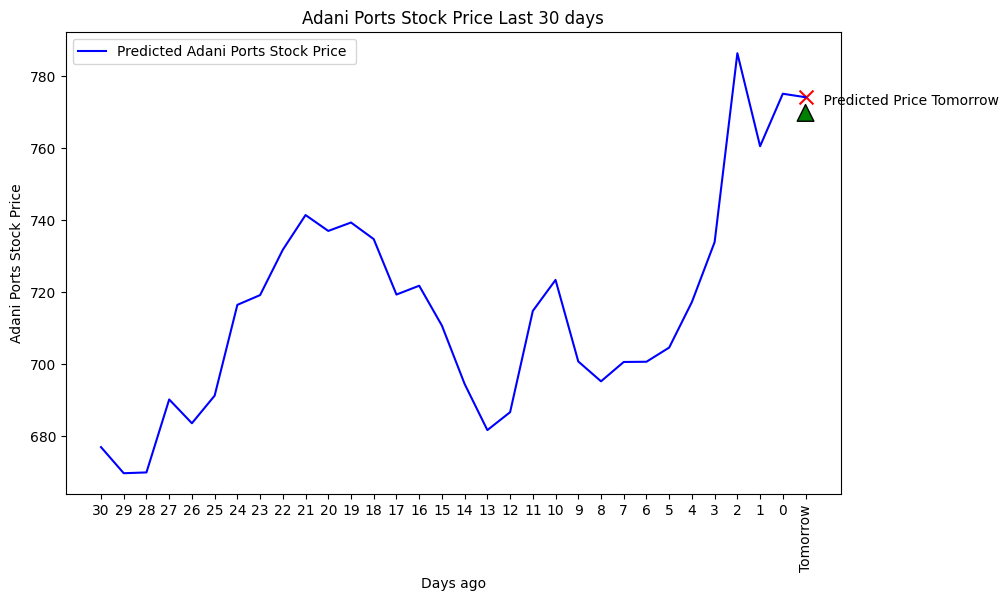

In [ ]:
plotPredictionsGraph(predictions)

### stock # 2

In [ ]:
dataset_train_asian = pd.read_csv('/content/ASIANPAINT.csv')

In [ ]:
del dataset_train_asian['Symbol']
del dataset_train_asian['Series']
del dataset_train_asian['VWAP']
del dataset_train_asian['Trades']
del dataset_train_asian['Deliverable Volume']
del dataset_train_asian['%Deliverble']

In [ ]:
df_test_asian = dataset_train_asian.head(100)

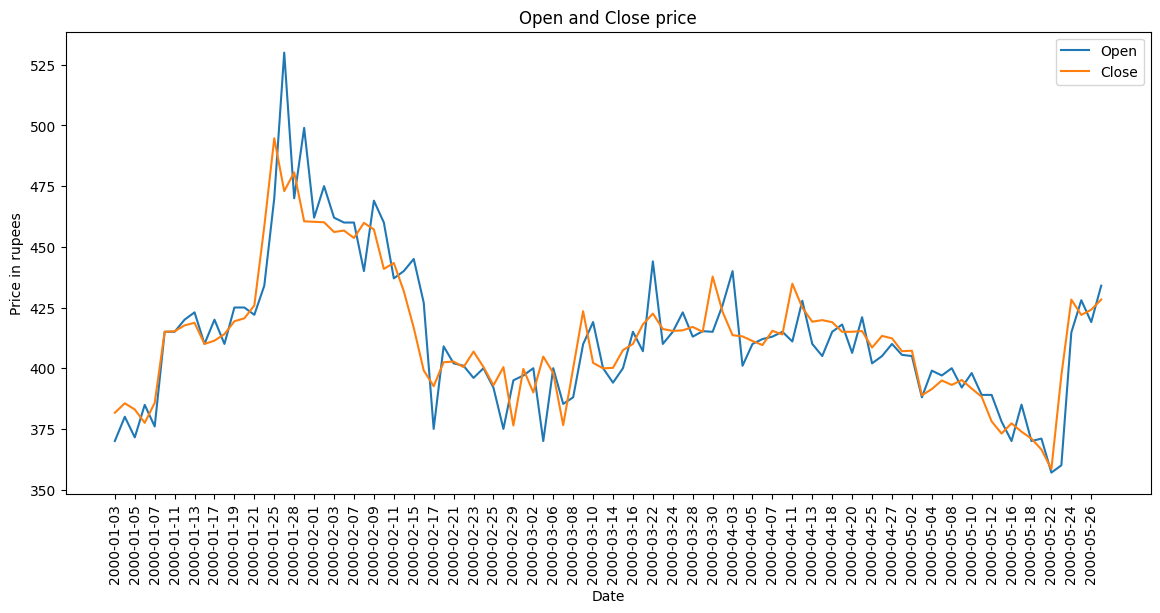

In [ ]:
#Graphing open and close price for past 100 days
plt.figure(figsize=(14,6))
plt.plot(df_test_asian['Date'], df_test_asian['Open'], label='Open')
plt.plot(df_test_asian['Date'], df_test_asian['Close'], label='Close')
plt.title('Open and Close price')
plt.ylabel('Price in rupees')
plt.xlabel('Date')

# Set alternate x-ticks
xticks_positions = [df_test_asian['Date'][i] for i in range(len(df_test_asian['Date'])) if i % 2 == 0]  # Select every other tick position
xticks_labels = [i for i in xticks_positions]  # Provide labels for the selected tick positions
plt.xticks(xticks_positions, xticks_labels)
plt.xticks(rotation=90)

plt.legend()

plt.show()

In [ ]:
# Feature Scaling
training_set_asian = dataset_train_asian['Open'].values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled_asian = sc.fit_transform(training_set_asian)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train_asian = []
y_train_asian = []
for i in range(60, len(training_set_asian)):
    X_train_asian.append(training_set_scaled_asian[i-60:i, 0])
    y_train_asian.append(training_set_scaled_asian[i, 0])
X_train_asian, y_train_asian = np.array(X_train_asian), np.array(y_train_asian)

In [ ]:
# Reshaping
X_train_asian = np.reshape(X_train_asian, (X_train_asian.shape[0], X_train_asian.shape[1], 1))

In [ ]:
# Splitting for train and test data
from sklearn.model_selection import train_test_split
X_train_asian, X_test_asian, y_train_asian,y_test_asian = train_test_split(X_train_asian, y_train_asian, test_size=0.2, random_state=42)

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train_adani, y_train_adani, epochs = 100, batch_size = 32)

Epoch 1/100
82/82 [==============================] - 11s 136ms/step - loss: 4.8749e-04
Epoch 2/100
82/82 [==============================] - 11s 134ms/step - loss: 4.8561e-04
Epoch 3/100
82/82 [==============================] - 10s 123ms/step - loss: 4.7610e-04
Epoch 4/100
82/82 [==============================] - 11s 130ms/step - loss: 5.4786e-04
Epoch 5/100
82/82 [==============================] - 11s 133ms/step - loss: 4.8703e-04
Epoch 6/100
82/82 [==============================] - 11s 133ms/step - loss: 4.4547e-04
Epoch 7/100
82/82 [==============================] - 11s 134ms/step - loss: 4.5186e-04
Epoch 8/100
82/82 [==============================] - 11s 134ms/step - loss: 4.2475e-04
Epoch 9/100
82/82 [==============================] - 10s 126ms/step - loss: 3.8636e-04
Epoch 10/100
82/82 [==============================] - 10s 126ms/step - loss: 4.8274e-04
Epoch 11/100
82/82 [==============================] - 11s 134ms/step - loss: 4.4874e-04
Epoch 12/100
82/82 [=====================

In [ ]:
# Getting the predicted stock price of 2017
X_test = np.reshape(X_test_asian, (X_test_asian.shape[0], X_test_asian.shape[1], 1))
predicted_stock_price_asian = regressor.predict(X_test_asian)
predicted_stock_price_asian = sc.inverse_transform(predicted_stock_price_asian)

33/33 [==============================] - 1s 33ms/step


In [ ]:
real_stock_price_asian = sc.inverse_transform(y_test_asian[:len(predicted_stock_price_asian)].reshape(-1,1))

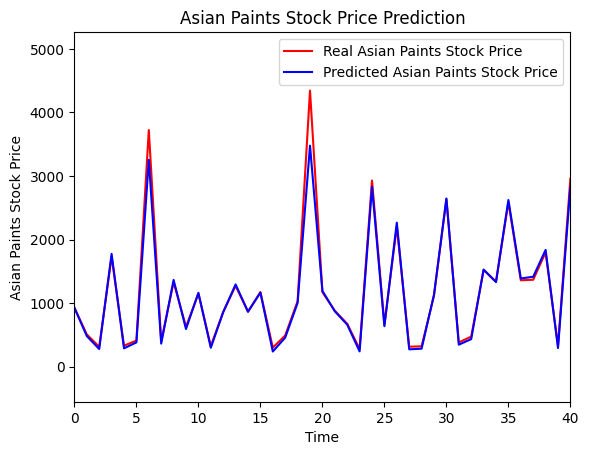

In [ ]:
# Visualising the results for 30 timestamps
plt.plot(real_stock_price_asian, color = 'red', label = 'Real Asian Paints Stock Price')
plt.plot(predicted_stock_price_asian, color = 'blue', label = 'Predicted Asian Paints Stock Price')
plt.title('Asian Paints Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Asian Paints Stock Price')
plt.xlim(0,40)
plt.legend()
plt.show()

#### Making predicitons

In [ ]:
def predictStock():
    date = input("Enter today's date. YYYY-MM-DD: ")
    try:
        idx = dataset_train_asian[dataset_train_asian['Date'] == date].index[0]
        dataset = dataset_train_asian[:idx+1]
    except:
        print("Data not available for this particular date")

    dataset = dataset['Open'].values.reshape(-1,1)
    dataset_scaled = sc.fit_transform(dataset)

    # Creating a data structure with 60 timesteps and 1 output
    dataset = []
    for i in range(60, len(dataset_scaled)):
        dataset.append(dataset_scaled[i-60:i, 0])
    dataset = np.array(dataset)

    data_test = np.reshape(dataset, (dataset.shape[0], dataset.shape[1], 1))

    predictions = regressor.predict(data_test)
    predictions = sc.inverse_transform(predictions)

    return predictions, idx

In [ ]:
def calculateStats(predictions):
    next_day_pred = predictions[-1][0]
    previous_day_price = predictions[-2][0]
    increase = round(100 * (next_day_pred - previous_day_price) / previous_day_price, 2)

    return next_day_pred, increase

In [ ]:
def plotPredictionsGraph(predictions):
    predictions_last30days = predictions[len(predictions)-32:]

    # Visualising prediction
    # Shows graph for last 30 days (1 month) and the next day's predicted value
    plt.figure(figsize=(10,6))
    plt.plot(predictions_last30days, color = 'blue', label = 'Predicted Asian Paints Stock Price ')
    plt.scatter(31, predictions_last30days[-1], marker='x', color='red', s=100)

    arrow_x = 31
    arrow_y = predictions_last30days[-1] - 2
    # Add the arrow using annotate()
    plt.annotate("    Predicted Price Tomorrow",
             xy=(arrow_x, arrow_y),
             arrowprops=dict(facecolor='green', shrink=0.05))

    # Customize the tick names on the x-axis
    new_tick_names = [30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0, 'Tomorrow']
    plt.gca().set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
    plt.gca().set_xticklabels(new_tick_names)
    plt.gca().get_xticklabels()[-1].set_rotation(90)

    plt.title('Asian Paints Stock Price Last 30 days')
    plt.xlabel('Days ago')
    plt.ylabel('Asian paints Stock Price')
    plt.legend()
    plt.show()

In [ ]:
predictions, idx = predictStock()

Enter today's date. YYYY-MM-DD: 2021-04-13
164/164 [==============================] - 6s 37ms/step


In [ ]:
next_day_pred_asian, increase_asian = calculateStats(predictions)
print(f"The price predicted for tomorrow is: {next_day_pred_asian} \nThis is a {increase_asian} % increase from today")

The price predicted for tomorrow is: 2580.788330078125 
This is a -1.42 % increase from today


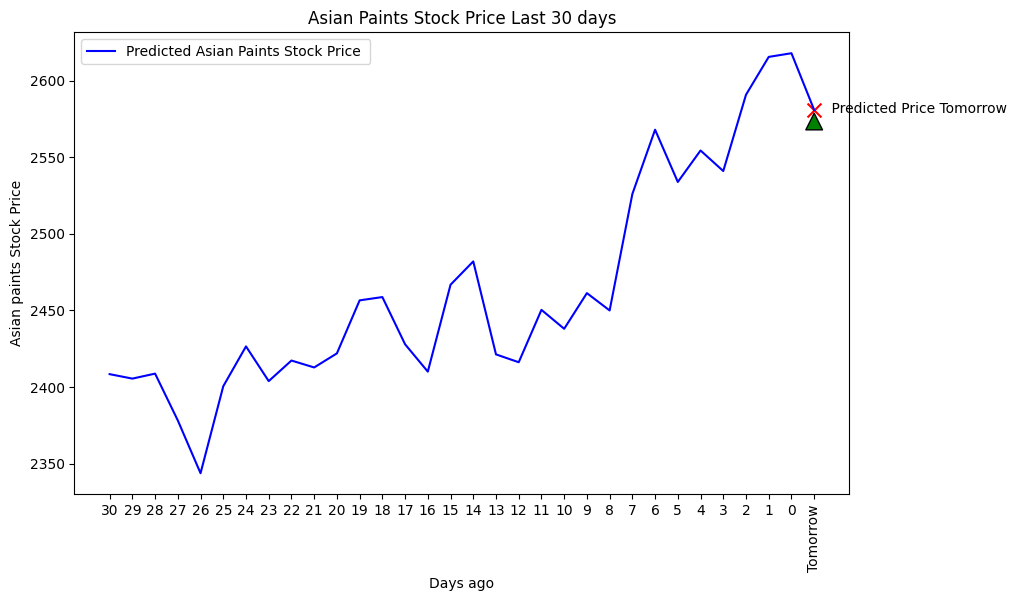

In [ ]:
plotPredictionsGraph(predictions)

### Compare stocks

In [ ]:
def compareStocks(adani_increase, asian_increase):
    if adani_increase > asian_increase:
        print(f"Adani Ports has higher predicted increase with {adani_increase}% as compared to Asian Paints {asian_increase}%")
    else:
        print(f"Asian Paints has higher predicted increase with {asian_increase}% as compared to Adani Ports {adani_increase}%")

In [ ]:
compareStocks(increase_adani, increase_asian)

Adani Ports has higher predicted increase with -0.13% as compared to Asian Paints -1.42%
